In [1]:
from tensorflow.keras.datasets import mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = (x_train/255)
x_test = (x_test/255)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(28,28))
reshape_flat = layers.Reshape([784])(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(reshape_flat)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
output = layers.Reshape([28, 28])(decoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, output)

In [14]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
autoencoder.fit(x_train, x_train, batch_size=500, epochs=5)

Epoch 1/5
120/120 [==============================] - 2s 15ms/step - loss: 0.1345
Epoch 2/5
120/120 [==============================] - 2s 14ms/step - loss: 0.1270
Epoch 3/5
120/120 [==============================] - 2s 14ms/step - loss: 0.1210
Epoch 4/5
120/120 [==============================] - 2s 14ms/step - loss: 0.1162
Epoch 5/5
120/120 [==============================] - 2s 17ms/step - loss: 0.1123


In [17]:
outs = autoencoder.predict(x_test[:5])

In [18]:
import matplotlib.pyplot as plt

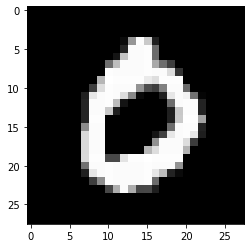

In [21]:
plt.imshow(x_test[3], cmap="gray")

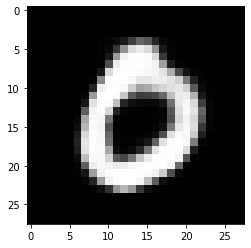

In [22]:
plt.imshow(outs[3], cmap="gray")

In [31]:
encoding_dim = 32

# encoder
input_img = keras.Input(shape=(28,28))
reshape_flat = layers.Reshape([784])(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(reshape_flat)
encoder = keras.Model(input_img, encoded)

# decoder
input_encoded = keras.Input(shape=[encoding_dim])
decoded = layers.Dense(784, activation='sigmoid')(input_encoded)
output = layers.Reshape([28, 28])(decoded)
decoder = keras.Model(input_encoded, output)

# autoencoder
autoencoder = keras.models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

In [32]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Functional)         (None, 32)                25120     
_________________________________________________________________
model_4 (Functional)         (None, 28, 28)            25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [33]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [34]:
autoencoder.fit(x_train, x_train, batch_size=500, epochs=10)

Epoch 1/10
120/120 [==============================] - 2s 14ms/step - loss: 0.3418
Epoch 2/10
120/120 [==============================] - 2s 14ms/step - loss: 0.2091
Epoch 3/10
120/120 [==============================] - 2s 16ms/step - loss: 0.1748
Epoch 4/10
120/120 [==============================] - 2s 18ms/step - loss: 0.1566
Epoch 5/10
120/120 [==============================] - 2s 13ms/step - loss: 0.1436
Epoch 6/10
120/120 [==============================] - 2s 14ms/step - loss: 0.1343
Epoch 7/10
120/120 [==============================] - 1s 12ms/step - loss: 0.1271
Epoch 8/10
120/120 [==============================] - 1s 12ms/step - loss: 0.1211
Epoch 9/10
120/120 [==============================] - 1s 12ms/step - loss: 0.1162
Epoch 10/10
120/120 [==============================] - 1s 11ms/step - loss: 0.1120


In [35]:
outs = autoencoder.predict(x_test[:5])

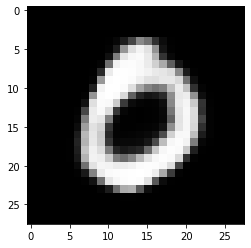

In [36]:
plt.imshow(outs[3], cmap="gray")